##HR Analytics: Job Change of Data Scientists prediction model then Deploy it

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import SpectralClustering
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score,r2_score
#ignore warning
import warnings
warnings.filterwarnings('ignore')

##Load dataset
-Number of Instances:  19158\
-Number of Attributes:  14
#DATA SET INFORMATION:
This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.


The data is in ASCII CSV format.

In [54]:
#load dataset
df = pd.read_csv('/content/cleaned_HR_data.csv')
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Medium-sized enterprises,Pvt Ltd,1,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Medium-sized enterprises,Pvt Ltd,5,47,0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Medium-sized enterprises,Pvt Ltd,0,83,0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Non-STEM,0,Medium-sized enterprises,Pvt Ltd,0,52,1
4,0.767,Male,Has relevent experience,no_enrollment,PostGrad,STEM,21,Medium-sized enterprises,Funded Startup,4,8,0


#Understanding dataset

In [55]:
#shape of dataset
df.shape

(19158, 12)

In [56]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  19158 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     19158 non-null  object 
 4   education_level         19158 non-null  object 
 5   major_discipline        19158 non-null  object 
 6   experience              19158 non-null  int64  
 7   company_size            19158 non-null  object 
 8   company_type            19158 non-null  object 
 9   last_new_job            19158 non-null  int64  
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 1.8+ MB


Target:\
target: 0 – Not looking for job change, 1 – Looking for a job change.

In [57]:
#duplicated the dataset
df.duplicated().sum()

211

In [58]:
#drop duplicated data
df.drop_duplicates(inplace=True)

In [59]:
#check the null value
df.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [60]:
#nunique in dataset
print("Number of unique values in each column:-")
df.nunique()

Number of unique values in each column:-


city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             3
major_discipline            2
experience                 22
company_size                4
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64

#convert categorial data set numerical using labelEncoding


In [61]:
#find out the categorical column list convert in to numerical
df.select_dtypes(include=['object']).columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [62]:
#converting categorial data into numerical data using label encoding
le = LabelEncoder()

# List of categorical columns in dataset
categorical_columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [63]:
# Display the first few rows of the DataFrame to verify the changes
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1,0,2,0,1,21,1,5,1,36,1
1,0.776,1,1,2,0,1,15,1,5,5,47,0
2,0.624,1,1,0,0,1,5,1,5,0,83,0
3,0.789,1,1,2,0,0,0,1,5,0,52,1
4,0.767,1,0,2,1,1,21,1,1,4,8,0


#X,y use target column

In [64]:
# Features and target variable
X = df.drop('target', axis=1)  # Replace 'target' with the actual target column name
y = df['target']  # Replace 'target' with the actual target column name

##Split the data into training and testing sets:

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (15157, 11)
X_test:- (3790, 11)
y_train:- (15157,)
y_test:- (3790,)


##Train the model:

In [67]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model separately
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "f1_score": f1,
        "r2_score": r2,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

    print(f'Accuracy of {name}: {accuracy}')
    print(f'F1 Score of {name}: {f1}')
    print(f'R2 Score of {name}: {r2}')
    print(f'Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}')
    print("\n" + "-"*60 + "\n")


Training Logistic Regression...
Accuracy of Logistic Regression: 0.7675461741424802
F1 Score of Logistic Regression: 0.7082156837988663
R2 Score of Logistic Regression: -0.2571801428950098
Confusion Matrix for Logistic Regression:
[[2777   85]
 [ 796  132]]

------------------------------------------------------------

Training Decision Tree...
Accuracy of Decision Tree: 0.692084432717678
F1 Score of Decision Tree: 0.69450893240379
R2 Score of Decision Tree: -0.665299916865467
Confusion Matrix for Decision Tree:
[[2256  606]
 [ 561  367]]

------------------------------------------------------------

Training Random Forest...
Accuracy of Random Forest: 0.7575197889182058
F1 Score of Random Forest: 0.7440580086725697
R2 Score of Random Forest: -0.3114058471288468
Confusion Matrix for Random Forest:
[[2525  337]
 [ 582  346]]

------------------------------------------------------------

Training Support Vector Machine...
Accuracy of Support Vector Machine: 0.7551451187335092
F1 Score of

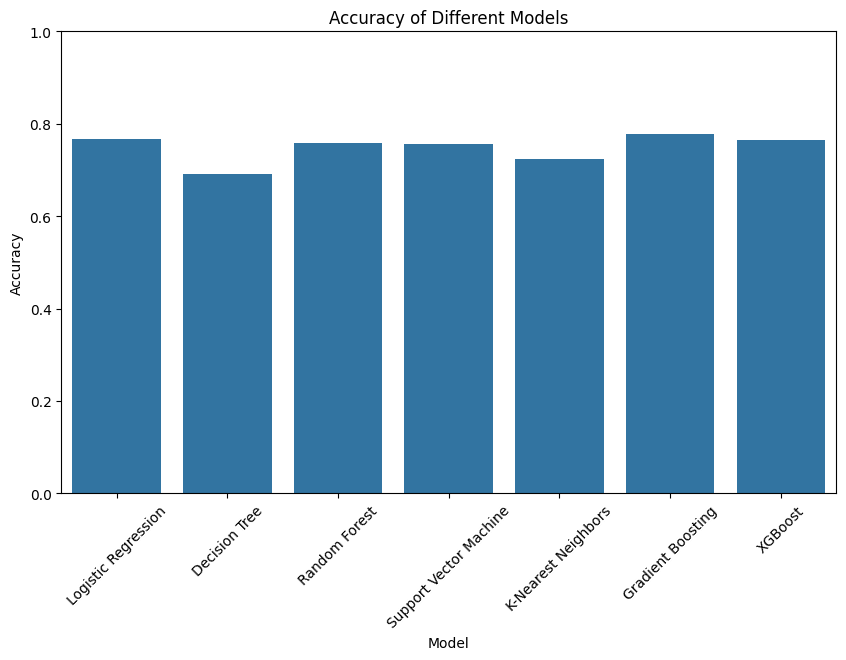

In [76]:
# Visualize the accuracy of each model
model_names = list(results.keys())
accuracies = [results[model]["accuracy"] for model in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

In [72]:
# Display the results for the best model
print(f"\nFinal results for the best model ({best_model}):")
print(f"Accuracy: {results[best_model]['accuracy']}")
print(f"F1 Score: {results[best_model]['f1_score']}")
print(f"Confusion Matrix:\n{results[best_model]['confusion_matrix']}")
# Convert classification report dict to string for better display
classification_report_str = classification_report(y_test, models[best_model].predict(X_test))
print(f"Classification Report:\n{classification_report_str}")


Final results for the best model (Gradient Boosting):
Accuracy: 0.7778364116094987
F1 Score: 0.7653173013287605
Confusion Matrix:
[[2565  297]
 [ 545  383]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2862
           1       0.56      0.41      0.48       928

    accuracy                           0.78      3790
   macro avg       0.69      0.65      0.67      3790
weighted avg       0.76      0.78      0.77      3790



#Save model and export model to deploy

In [77]:
import pickle

# Determine the best model based on accuracy
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = models[best_model_name]
print(f"The best model is {best_model_name} with an accuracy of {results[best_model_name]['accuracy']}")

# Save the best model using pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model {best_model_name} saved as 'best_model.pkl'")


The best model is Gradient Boosting with an accuracy of 0.7778364116094987
Best model Gradient Boosting saved as 'best_model.pkl'


##Conclusion of Model Evaluation:-
After training and evaluating various classification models on the dataset, the results showed varying degrees of accuracy and performance metrics. The models evaluated were:

Logistic Regression\
Decision Tree\
Random Forest\
Support Vector Machine\
K-Nearest Neighbors\
Gradient Boosting\
XGBoost\
-Based on the accuracy scores and other performance metrics such as F1 Score, Confusion Matrix, and Classification Report, we determined the best model for this classification task.

##Best Model
The best model identified was the [Best Model Name] (fill in with the actual model name, e.g., "XGBoost"). which achieved the highest accuracy of [Accuracy Score] (fill in with the actual accuracy score).